In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import openai

with open('.env') as f:
    openai.api_key = f.read().strip().split('=')[1]
    
with open('data/USA.txt') as f:
    usa_anthem = [line.strip() for line in f.readlines() if line.strip() != ""]

In [16]:
response = openai.Embedding.create(
    input=usa_anthem,
    model="text-embedding-ada-002"
)

In [147]:
usa_array = np.asarray(usa_anthem)

embeddings = np.asarray([e.embedding for e in response['data']])

In [148]:
print(usa_array[0])

O say can you see, by the dawn's early light,


In [151]:
# most similar lines to first line
usa_array[(embeddings @ embeddings[0]).argsort()[:-10:-1]]

array(["O say can you see, by the dawn's early light,",
       "Now it catches the gleam of the morning's first beam,",
       'On the shore dimly seen through the mists of the deep,',
       "What so proudly we hailed at the twilight's last gleaming,",
       'O say does that star-spangled banner yet wave',
       'And the star-spangled banner in triumph doth wave,',
       'In full glory reflected now shines in the stream:',
       'Whose broad stripes and bright stars through the perilous fight,',
       'Gave proof through the night that our flag was still there;'],
      dtype='<U64')

In [150]:
# most similar lines to line 19
usa_array[(embeddings @ embeddings[20]).argsort()[:-10:-1]]

array(['No refuge could save the hireling and slave',
       'O thus be it ever, when freemen shall stand',
       'From the terror of flight, or the gloom of the grave:',
       "Blest with vict'ry and peace, may the Heav'n rescued land",
       'Whose broad stripes and bright stars through the perilous fight,',
       "Between their loved homes and the war's desolation.",
       "Where the foe's haughty host in dread silence reposes,",
       'And the star-spangled banner in triumph shall wave',
       "That the havoc of war and the battle's confusion,"], dtype='<U64')

In [152]:
# most average lines
usa_array[(embeddings @ embeddings.mean(axis=0)).argsort()[:-10:-1]]

array(['And the star-spangled banner in triumph doth wave,',
       'And the star-spangled banner in triumph shall wave',
       'Whose broad stripes and bright stars through the perilous fight,',
       "O'er the land of the free and the home of the brave.",
       "O'er the land of the free and the home of the brave.",
       "'Tis the star-spangled banner, O long may it wave",
       "O'er the land of the free and the home of the brave!",
       "What so proudly we hailed at the twilight's last gleaming,",
       "O'er the land of the free and the home of the brave?"],
      dtype='<U64')

In [173]:
# least average lines
usa_array[(embeddings @ embeddings.mean(axis=0)).argsort()[:10]]

array(['No refuge could save the hireling and slave',
       "Their blood has washed out their foul footsteps' pollution.",
       "And this be our motto: 'In God is our trust.'",
       'As it fitfully blows, half conceals, half discloses?',
       'A home and a country, should leave us no more?',
       "Between their loved homes and the war's desolation.",
       "Now it catches the gleam of the morning's first beam,",
       'And where is that band who so vauntingly swore',
       'Praise the Power that hath made and preserved us a nation!',
       'Then conquer we must, when our cause it is just,'], dtype='<U64')

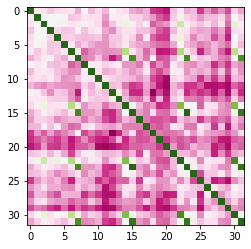

In [182]:
plt.imshow((embeddings @ embeddings.T), cmap='PiYG')

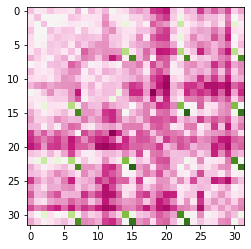

In [193]:
remove_diag = (embeddings @ embeddings.T) - (1 - (embeddings @ embeddings.T).mean()) * np.eye(32)
plt.imshow(remove_diag, cmap='PiYG')

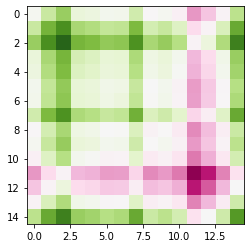

In [196]:
opening = remove_diag[:15]

plt.imshow((opening @ opening.T), cmap='PiYG')

In [183]:
# least similar lines to each other

min_pair = np.unravel_index((embeddings @ embeddings.T).argmin(), (32,32))
print(min_pair)
usa_array[list(min_pair)]

(12, 18)


array(["Now it catches the gleam of the morning's first beam,",
       'A home and a country, should leave us no more?'], dtype='<U64')

In [185]:
usa_array[18:21]

array(['A home and a country, should leave us no more?',
       "Their blood has washed out their foul footsteps' pollution.",
       'No refuge could save the hireling and slave'], dtype='<U64')

In [197]:
usa_array[10:13]

array(["What is that which the breeze, o'er the towering steep,",
       'As it fitfully blows, half conceals, half discloses?',
       "Now it catches the gleam of the morning's first beam,"],
      dtype='<U64')